In [1]:
# Proctor and Gamble, Microsoft, Ford and General Electric is in our portfolio

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [5]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']


In [10]:
# Gives us general information about the porfolio
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5777 entries, 1995-01-03 to 2017-12-08
Data columns (total 4 columns):
PG      5777 non-null float64
MSFT    5777 non-null float64
F       5777 non-null float64
GE      5777 non-null float64
dtypes: float64(4)
memory usage: 225.7 KB


In [11]:
# Pulls the first 5 columns from the data
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.960464,2.498429,5.091914,4.479902
1995-01-04,8.888638,2.516591,5.228918,4.479902
1995-01-05,8.762941,2.475080,5.183250,4.490882
1995-01-06,8.780898,2.516591,5.183250,4.468922
1995-01-09,8.744981,2.501024,5.274583,4.425002


In [12]:
# Pulls the last 5 columns from the data
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2017-12-04,91.410004,81.080002,12.63,17.950001
2017-12-05,91.400002,81.589996,12.43,17.760000
2017-12-06,91.250000,82.779999,12.38,17.660000
2017-12-07,90.099998,82.489998,12.53,17.709999
2017-12-08,90.370003,84.160004,12.61,17.709999


# Normalization to 100:

p(subscript t)/p(subscript 0) * 100

In [13]:
# grabs the first row of our data table
mydata.iloc[0] 

PG      8.960464
MSFT    2.498429
F       5.091914
GE      4.479902
Name: 1995-01-03 00:00:00, dtype: float64

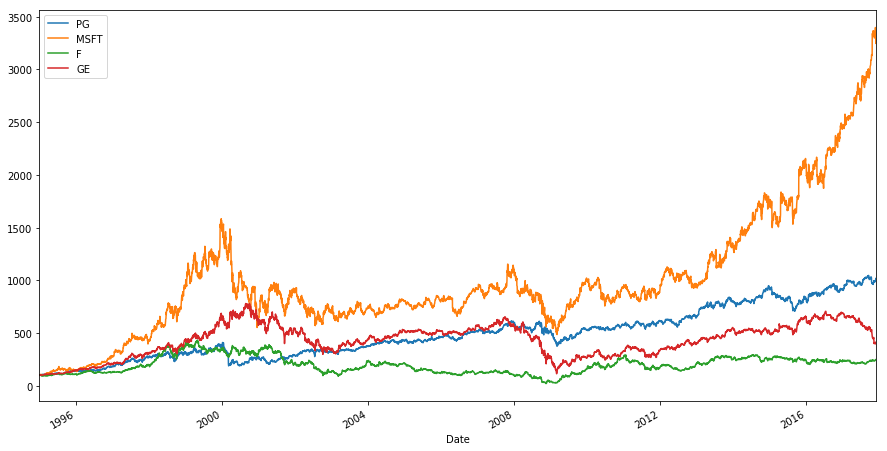

In [24]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 8)); # 15 deals with the width and 8 deals with the price.
plt.show() # this function always plots the price using matplotlib functions.

# This compares the stocks as if they were all starting from the same price 100

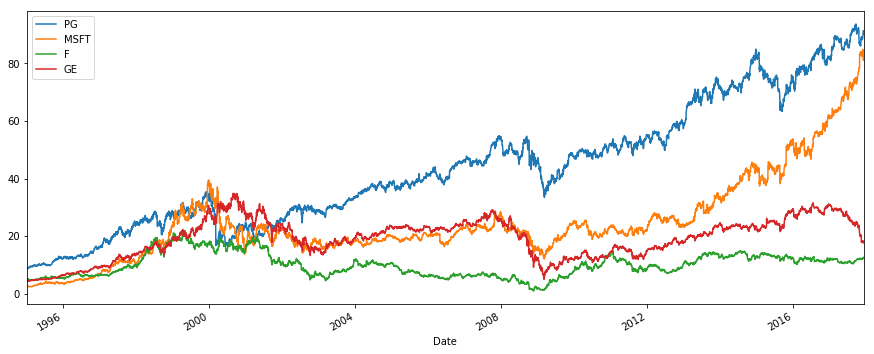

In [16]:
# # This doesn't give us an accurate base to compare stocks in our portfolio. It's all over the place.
mydata.plot(figsize =(15 ,6)) 
plt.show()

In [25]:
mydata.loc['1995-01-03'] # Specifies the date that you want

PG      8.960464
MSFT    2.498429
F       5.091914
GE      4.479902
Name: 1995-01-03 00:00:00, dtype: float64

In [26]:
mydata.iloc[0] # specificies the actual row in terms of index type

PG      8.960464
MSFT    2.498429
F       5.091914
GE      4.479902
Name: 1995-01-03 00:00:00, dtype: float64

# Calculate the Return of a Portfolio of Securities

In [27]:
returns = (mydata / mydata.shift(1)) - 1 
'''
We are using the simple rate of return because we are analyzing a few set of
stocks over the period of certain amount of time.

'''
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [28]:
weights = np.array([.25, .25, .25, .25]) 
''' 
the weight of the porfolio must add up to 1, which is equivalent to 100%. 
 - In order words, based on this stocks weight in this porfolio, what is it's
     rate of return?
'''

In [29]:
np.dot(returns, weights)

array([        nan,  0.00653992, -0.00922976, ...,  0.00082271,
       -0.00028963,  0.00740659])

In [30]:
annual_returns = returns.mean() * 250 
# remember there are about 250 days of stock trading in a year.

In [31]:
annual_returns

PG      0.125395
MSFT    0.202102
F       0.119317
GE      0.101903
dtype: float64

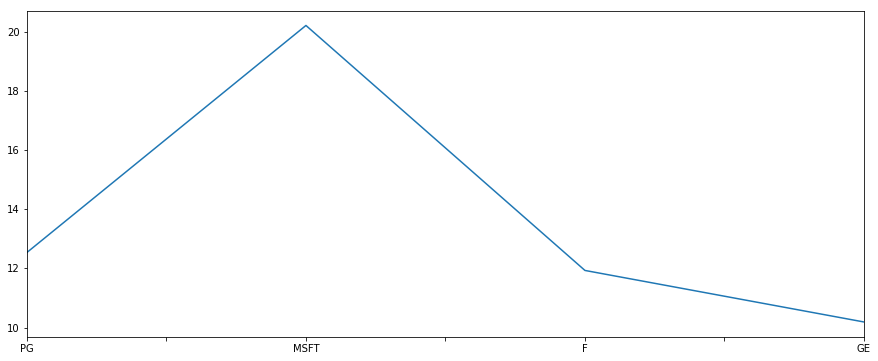

" \nI just went ahead and created a graph for each of the portfolio's rate of return\nso I can get an accurate view of what each stock return is for the year.\n\n\n"

In [35]:
annual_returns.plot(figsize = (15, 6))
plt.show()


''' 
I just went ahead and created a graph for each of the portfolio's rate of return
so I can get an accurate view of what each stock return is for the year.


'''

In [39]:
annual_returns.head() 
# So pretty much this just shows the annual return of each stock so that ->
# you can see which stock has a higher annual rate of return. 
# In this case you can see that MSFT is better than all of the others.

PG      12.539512
MSFT    20.210151
F       11.931708
GE      10.190324
dtype: float64